# <center> TensorFlow and Deep Learning </center>

## Convolutional Neural Networks - CIFAR10

<br>

<center> ![](cifar10.png) </center>

*<p style="text-align:right">CIFAR10 - Adapted from Alex Krizhevsky at https://www.cs.toronto.edu/~kriz/cifar.html</p>*



In [23]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf

In [24]:
class CifarLoader(object):
    def __init__(self, source_files):
        self._source = source_files
        self._i = 0
        self.images = None
        self.labels = None
        
    def load(self):
        data = [unpickle(f) for f in self._source]
        images = np.vstack([d[b"data"] for d in data])
        n = len(images)
        self.images = images.reshape(n, 3, 32, 32).transpose(0, 2, 3, 1).astype(float)/255
        self.labels = one_hot(np.hstack([d[b"labels"] for d in data]), 10)
        return self
    
    def next_batch(self, batch_size):
        x, y = self.images[self._i:self._i+batch_size], self.labels[self._i:self._i+batch_size]
        self._i = (self._i + batch_size)%len(self.images)
        return x, y    

In [25]:
path = "cifar10"

def unpickle(file):
    with open(os.path.join(path,file), 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def one_hot(vec, vals=10):
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

class CifarDataManager(object):
    def __init__(self):
        self.train = CifarLoader(["data_batch_{}".format(i) for i in range(1,6)]).load()
        self.test = CifarLoader(["test_batch"]).load()

Number of train images: 50000
Number of train labels: 50000
Number of test images: 10000
Number of test labels: 10000


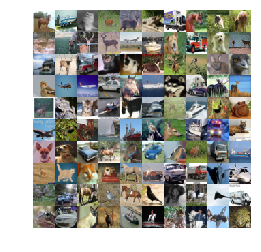

In [29]:
def display_cifar(images, size):
    n = len(images)
    plt.figure()
    plt.gca().set_axis_off()
    im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)]) for i in range(size)])
    plt.imshow(im)
    plt.show()
    
d = CifarDataManager()

print("Number of train images: {}".format(len(d.train.images)))
print("Number of train labels: {}".format(len(d.train.labels)))
print("Number of test images: {}".format(len(d.test.images)))
print("Number of test labels: {}".format(len(d.test.labels)))

images = d.train.images
display_cifar(images, 10)